In [1]:
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np

In [3]:
training_dataset = pd.read_csv('data/kannada-mnist/train.csv')

In [4]:
training_dataset.shape

(60000, 785)

In [5]:
training_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
img = training_dataset.iloc[0]

In [7]:
import matplotlib.pyplot as plt

In [8]:
img = np.array(img[1:]).reshape((28,28,1))

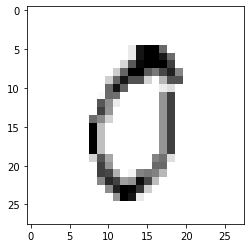

In [9]:
plt.imshow(img,cmap=plt.cm.binary)

In [10]:
train_y = training_dataset['label']

In [11]:
train_y.shape

(60000,)

In [12]:
columns = training_dataset.columns

In [13]:
columns_x = columns[1:]

In [14]:
columns_x

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [15]:
train_x = training_dataset[columns_x]

In [16]:
train_x.shape

(60000, 784)

In [17]:
X , y = train_x , train_y

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_x , test_x , train_y , test_y = train_test_split(X , y)

In [20]:
print(train_x.shape,
test_x.shape,
train_y.shape,
test_y.shape)

(45000, 784) (15000, 784) (45000,) (15000,)


In [21]:
train_y = np.array(train_y).reshape((-1,1))
test_y = np.array(test_y).reshape((-1,1))

In [22]:
train_y = keras.utils.to_categorical(train_y)
test_y = keras.utils.to_categorical(test_y)

In [23]:
train_y.shape
test_y.shape

(15000, 10)

In [24]:
train_x = np.array(train_x).reshape((-1,28,28,1))
test_x = np.array(test_x).reshape((-1,28,28,1))

In [25]:
from tensorflow import keras

In [26]:
model = keras.Sequential(
[
    keras.layers.Conv2D(filters=128 , kernel_size=(3,3) ,  activation='relu' , input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64 , kernel_size=(3,3) , activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               160100    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [29]:
epochs = 12

In [30]:
history = model.fit( train_x  , train_y ,  epochs = epochs , validation_data = (test_x , test_y))

Epoch 1/12
1407/1407 [==============================] - 12s 5ms/step - loss: 0.2388 - acc: 0.9481 - val_loss: 0.0427 - val_acc: 0.9865
Epoch 2/12
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0592 - acc: 0.9826 - val_loss: 0.0340 - val_acc: 0.9899
Epoch 3/12
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0483 - acc: 0.9855 - val_loss: 0.0262 - val_acc: 0.9928
Epoch 4/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0406 - acc: 0.9879 - val_loss: 0.0224 - val_acc: 0.9927
Epoch 5/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0380 - acc: 0.9890 - val_loss: 0.0345 - val_acc: 0.9912
Epoch 6/12
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0325 - acc: 0.9909 - val_loss: 0.0208 - val_acc: 0.9935
Epoch 7/12
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0298 - acc: 0.9913 - val_loss: 0.0260 - val_acc: 0.9925
Epoch 8/12
1407/1407 [==============================] - 6s 4m

In [31]:
history = history.history

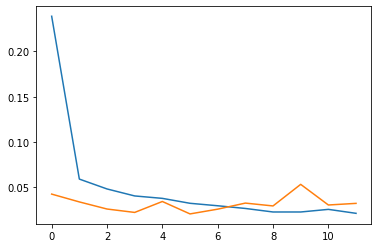

In [32]:
plt.plot(range(epochs),history['loss'])
plt.plot(range(epochs),history['val_loss'])

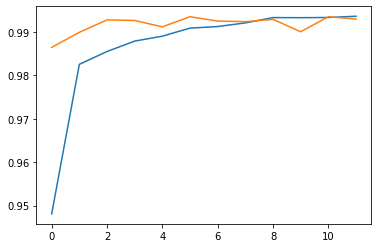

In [33]:
plt.plot(range(epochs),history['acc'])
plt.plot(range(epochs),history['val_acc'])

In [34]:
test_dataset = pd.read_csv('data/kannada-mnist/test.csv')

In [35]:
test_dataset.shape

(5000, 785)

In [37]:
test_dataset.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
validation_cols = test_dataset.columns[1:]

In [41]:
validation_cols

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [46]:
validation_x = np.asarray(test_dataset[validation_cols]).reshape((-1,28,28,1))

In [47]:
validation_x.shape

(5000, 28, 28, 1)

In [48]:
predictions = model.predict(validation_x)

In [50]:
predictions = [ np.argmax(prediction) for prediction in predictions]

In [53]:
submission_dataframe = pd.DataFrame({'id':test_dataset['id'] , 'label': predictions})

In [54]:
submission_dataframe.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7


In [56]:
submission_dataframe.to_csv('data/kannada-mnist/submission.csv' , index=False)